## Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

## Reading Data set

In [2]:
df=pd.read_csv("Fraud.csv")

In [3]:
df.sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4886093,348,CASH_OUT,441564.52,C1649878226,0.00,0.00,C487293888,2250897.83,2692462.35,0,0
1344773,137,PAYMENT,3532.28,C2015964106,0.00,0.00,M1787171407,0.00,0.00,0,0
3383435,255,PAYMENT,8133.48,C603624983,0.00,0.00,M1171531615,0.00,0.00,0,0
4580324,328,CASH_IN,46729.82,C2103894844,113702.00,160431.82,C1250942720,125893.20,79163.38,0,0
4081329,301,DEBIT,10477.95,C192122813,0.00,0.00,C757843656,1251166.27,1261644.21,0,0
2764976,213,PAYMENT,15645.81,C1337060512,126417.70,110771.89,M817345973,0.00,0.00,0,0
3898253,284,CASH_OUT,165264.79,C556732196,0.00,0.00,C823117986,491489.49,656754.28,0,0
1585879,155,CASH_IN,104169.87,C1653683379,4063144.46,4167314.33,C1983145441,209444.98,105275.12,0,0
1938424,177,TRANSFER,93426.77,C1107944623,0.00,0.00,C1769131415,621851.37,715278.14,0,0
1642490,157,CASH_IN,103208.64,C1606962683,62107.00,165315.64,C1676657523,0.00,0.00,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


## EDA(exploratory data analysis)

In [5]:
# checking for the Duplicate rows 
df.duplicated().sum()

0

In [6]:
# checking for null values in the data set
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df["type"].value_counts(dropna=False)

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

<AxesSubplot:>

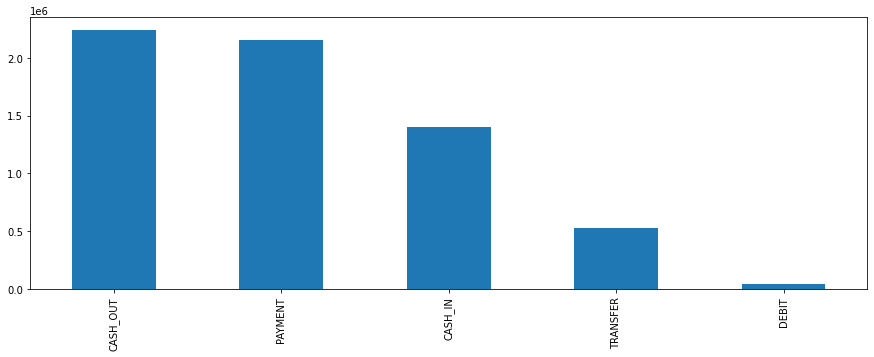

In [8]:
df["type"].value_counts().plot.bar(figsize=(15,5))

## Checking for Outliers by percentile method

In [10]:
df.describe(percentiles=[0.01, 0.02,0.03, 0.04, 0.05, 0.1, .2, .25, .3, .35, .4, .45, .5, .75,.80,.85, .9, .95, .96, .97, .98, .99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,...,75%,80%,85%,90%,95%,96%,97%,98%,99%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,9.0000,11.00,13.00,14.00,16.0000,35.0,...,3.350000e+02,355.000,3.780000e+02,399.000,4.900000e+02,5.250000e+02,5.630000e+02,5.940000e+02,6.810000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,449.4676,892.52,1335.67,1781.77,2224.0995,4501.3,...,2.087215e+05,246611.220,2.949193e+05,365423.309,5.186342e+05,5.940031e+05,7.364271e+05,1.019958e+06,1.615979e+06,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.0000,0.00,0.00,0.00,0.0000,0.0,...,1.073152e+05,198632.000,4.014821e+05,1822508.289,5.823702e+06,7.006676e+06,8.454913e+06,1.056632e+07,1.602726e+07,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.0000,0.00,0.00,0.00,0.0000,0.0,...,1.442584e+05,246708.080,4.463039e+05,1970344.793,5.980262e+06,7.162968e+06,8.608552e+06,1.072157e+07,1.617616e+07,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.0000,0.00,0.00,0.00,0.0000,0.0,...,9.430367e+05,1322204.406,1.902566e+06,2914266.669,5.147230e+06,6.019517e+06,7.280750e+06,9.174818e+06,1.237182e+07,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.0000,0.00,0.00,0.00,0.0000,0.0,...,1.111909e+06,1517362.866,2.133562e+06,3194869.671,5.515716e+06,6.425938e+06,7.718976e+06,9.665657e+06,1.313787e+07,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.0000,0.00,0.00,0.00,0.0000,0.0,...,0.000000e+00,0.000,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.0000,0.00,0.00,0.00,0.0000,0.0,...,0.000000e+00,0.000,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


{'whiskers': [<matplotlib.lines.Line2D at 0x1cea74bef70>,
 'caps': [<matplotlib.lines.Line2D at 0x1cea74d1610>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cea74beb20>],
 'medians': [<matplotlib.lines.Line2D at 0x1cea74d1d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cea74db100>],
 'means': []}

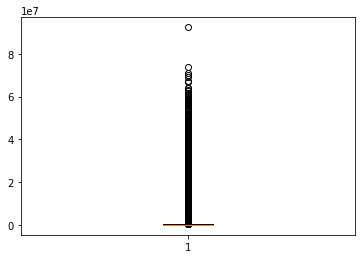

In [10]:
plt.boxplot(df["amount"])

In [11]:
df["amount"]=np.where(df["amount"]>7, 7, df["amount"])

{'whiskers': [<matplotlib.lines.Line2D at 0x25a31e8a790>,
 'caps': [<matplotlib.lines.Line2D at 0x25a31e8adf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25a31e8a340>],
 'medians': [<matplotlib.lines.Line2D at 0x25a31e98550>],
 'fliers': [<matplotlib.lines.Line2D at 0x25a31e988e0>],
 'means': []}

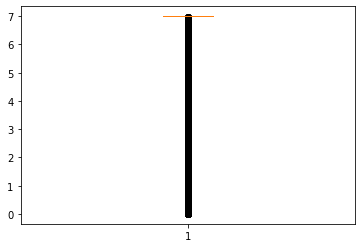

In [12]:
plt.boxplot(df["amount"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1cea7530d30>,
 'caps': [<matplotlib.lines.Line2D at 0x1cea7540490>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cea75309a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1cea7540bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cea7540f40>],
 'means': []}

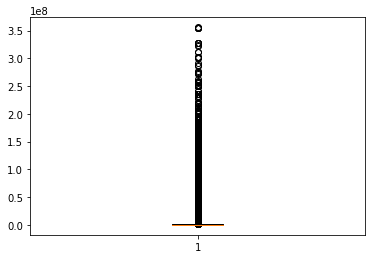

In [11]:
plt.boxplot(df["oldbalanceDest"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1cea75a79a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1cea75b5100>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cea75a7610>],
 'medians': [<matplotlib.lines.Line2D at 0x1cea75b5820>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cea75b5bb0>],
 'means': []}

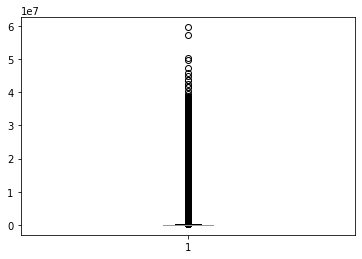

In [12]:
plt.boxplot(df["oldbalanceOrg"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1cea7612a90>,
 'caps': [<matplotlib.lines.Line2D at 0x1cea76201f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cea7612700>],
 'medians': [<matplotlib.lines.Line2D at 0x1cea7620910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cea7620ca0>],
 'means': []}

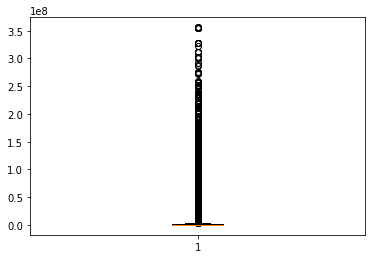

In [13]:
plt.boxplot(df["newbalanceDest"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1cea77d6430>,
 'caps': [<matplotlib.lines.Line2D at 0x1cea77d6b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cea77d60a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1cea77e32b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cea77e3640>],
 'means': []}

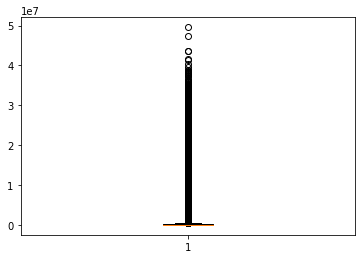

In [15]:
plt.boxplot(df["newbalanceOrig"])

## Variable selection 

In [13]:
cr=df.corr()

In [14]:
cr

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,-0.000251,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,-0.000251,1.000000,0.002648,0.002692,0.002898,0.003032,-0.009503,0.000017
oldbalanceOrg,-0.010058,0.002648,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,0.002692,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.002898,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.003032,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,-0.009503,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.000017,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


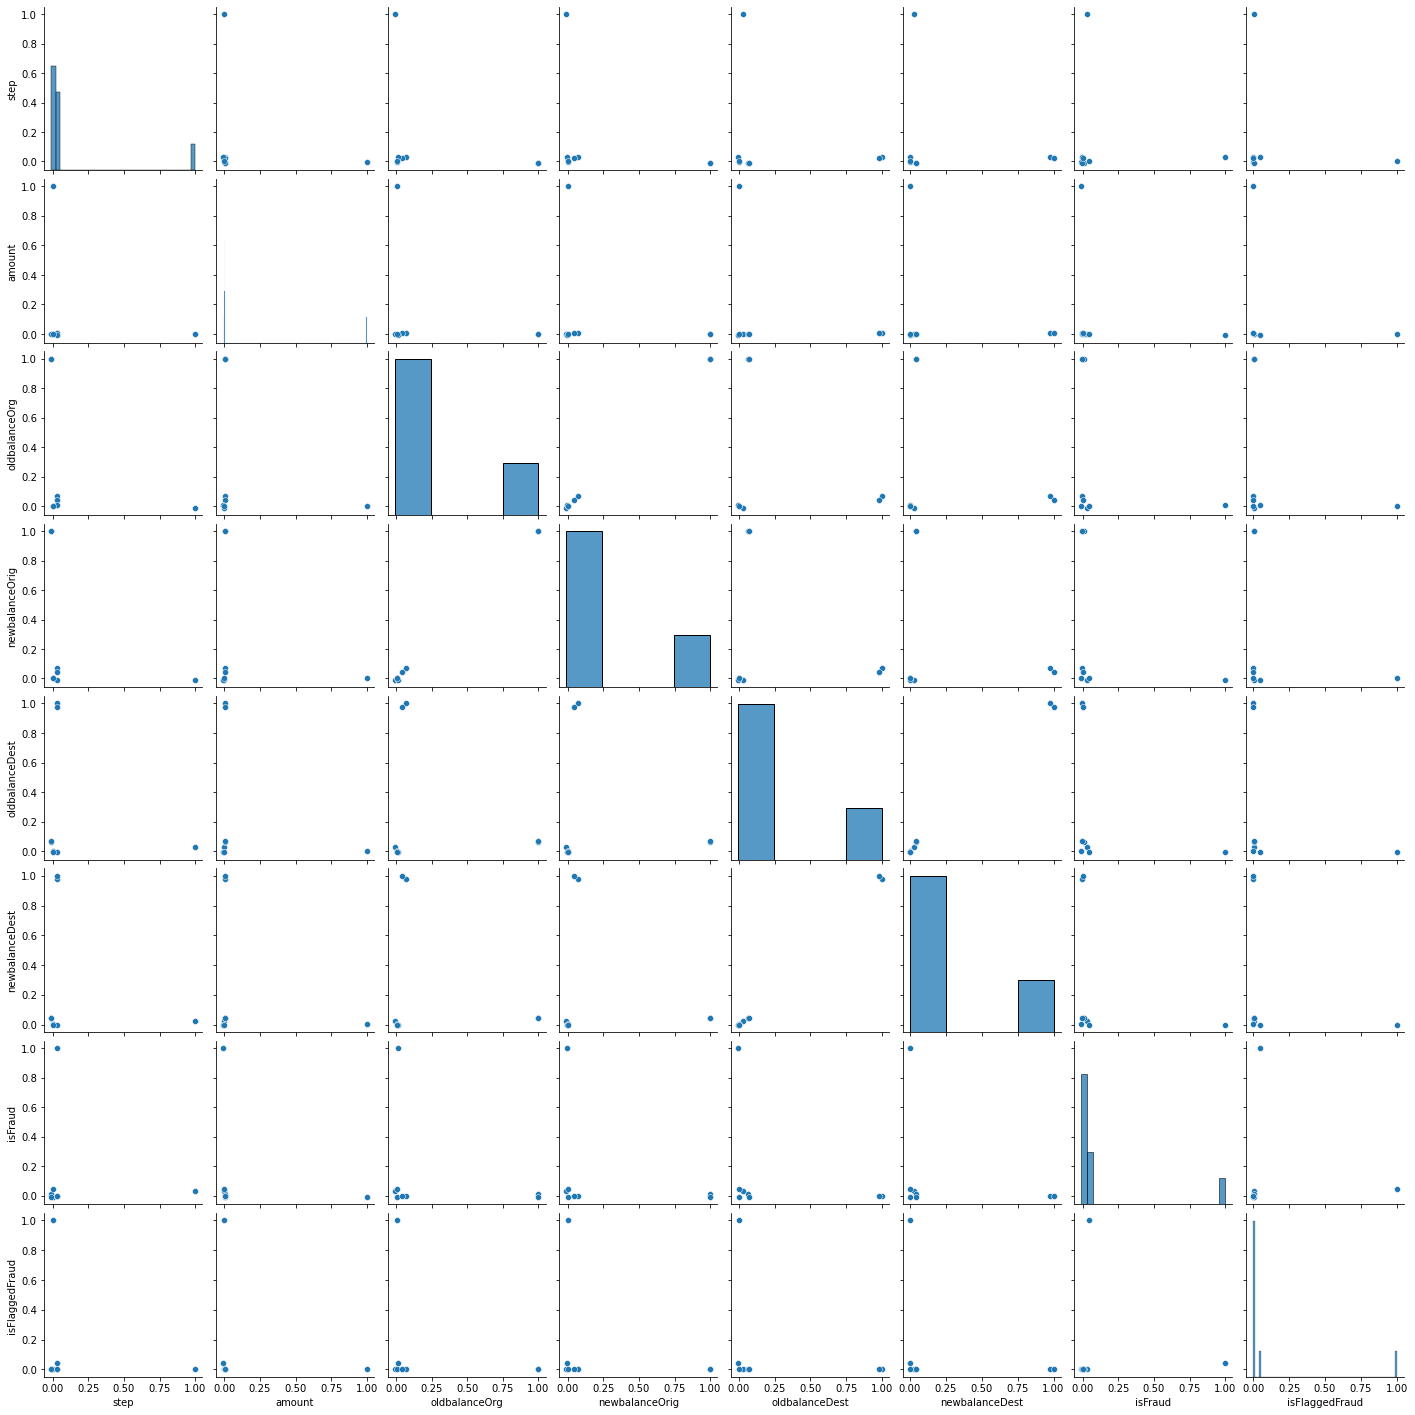

In [15]:
sns.pairplot(cr)
plt.show()

In [16]:
df1=df.drop(['nameOrig',"nameDest",], axis = 1)

In [17]:
df1

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,7.0,170136.00,160296.36,0.00,0.00,0,0
1,1,PAYMENT,7.0,21249.00,19384.72,0.00,0.00,0,0
2,1,TRANSFER,7.0,181.00,0.00,0.00,0.00,1,0
3,1,CASH_OUT,7.0,181.00,0.00,21182.00,0.00,1,0
4,1,PAYMENT,7.0,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,7.0,339682.13,0.00,0.00,339682.13,1,0
6362616,743,TRANSFER,7.0,6311409.28,0.00,0.00,0.00,1,0
6362617,743,CASH_OUT,7.0,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,TRANSFER,7.0,850002.52,0.00,0.00,0.00,1,0


In [18]:
df2=pd.get_dummies(df1, columns=["type",],prefix=["type",],drop_first=True)

In [19]:
df2

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,7.0,170136.00,160296.36,0.00,0.00,0,0,0,0,1,0
1,1,7.0,21249.00,19384.72,0.00,0.00,0,0,0,0,1,0
2,1,7.0,181.00,0.00,0.00,0.00,1,0,0,0,0,1
3,1,7.0,181.00,0.00,21182.00,0.00,1,0,1,0,0,0
4,1,7.0,41554.00,29885.86,0.00,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,7.0,339682.13,0.00,0.00,339682.13,1,0,1,0,0,0
6362616,743,7.0,6311409.28,0.00,0.00,0.00,1,0,0,0,0,1
6362617,743,7.0,6311409.28,0.00,68488.84,6379898.11,1,0,1,0,0,0
6362618,743,7.0,850002.52,0.00,0.00,0.00,1,0,0,0,0,1


In [20]:
y=df2["isFraud"]
X=df2.drop(columns=["isFraud"])

### splitting train and test data

In [21]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=99)

In [22]:
log=LogisticRegression()

In [23]:
log.fit(X_train, y_train)

LogisticRegression()

In [24]:
print("Train Accuracy", log.score(X_train, y_train))
print("Test Accuracy", log.score(X_test, y_test))

Train Accuracy 0.9992161809353469
Test Accuracy 0.9992283053207641


In [31]:
# print("Train Accuracy", log.score(X_train, y_train))
# print("Test Accuracy", log.score(X_test, y_test))

Train Accuracy 0.9987076303247944
Test Accuracy 0.9987127944148794


In [25]:
pred_y_train=log.predict(X_train)  # It predict Classes
pred_y_test=log.predict(X_test) # It predict Classes

In [26]:
print(metrics.classification_report(y_train, pred_y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4448078
           1       0.85      0.47      0.61      5756

    accuracy                           1.00   4453834
   macro avg       0.93      0.74      0.80   4453834
weighted avg       1.00      1.00      1.00   4453834



In [27]:
print(metrics.classification_report(y_test, pred_y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906329
           1       0.86      0.48      0.62      2457

    accuracy                           1.00   1908786
   macro avg       0.93      0.74      0.81   1908786
weighted avg       1.00      1.00      1.00   1908786



In [28]:
probs_train=pd.DataFrame(log.predict_proba(X_train), columns=["Prob_0", "Prob_1"]) # It predict Probability of 1 and 0
probs_test=pd.DataFrame(log.predict_proba(X_test), columns=["Prob_0", "Prob_1"]) # It predict Probability of 1 and 0
new_pred_y_train=np.where(probs_train["Prob_1"]>=0.27,1,0)
# new_pred_y_train
new_pred_y_test=np.where(probs_test["Prob_1"]>=0.27,1,0)
# new_pred_y_test
print(metrics.classification_report(y_train, new_pred_y_train))
print("++++++++++++++++++++++++++++++++++++++++++++++++++++")
print(metrics.classification_report(y_test, new_pred_y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4448078
           1       0.79      0.51      0.62      5756

    accuracy                           1.00   4453834
   macro avg       0.89      0.75      0.81   4453834
weighted avg       1.00      1.00      1.00   4453834

++++++++++++++++++++++++++++++++++++++++++++++++++++
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906329
           1       0.79      0.52      0.63      2457

    accuracy                           1.00   1908786
   macro avg       0.89      0.76      0.81   1908786
weighted avg       1.00      1.00      1.00   1908786



In [29]:
probs_train=pd.DataFrame(log.predict_proba(X_train), columns=["Prob_0", "Prob_1"]) # It predict Probability of 1 and 0
probs_test=pd.DataFrame(log.predict_proba(X_test), columns=["Prob_0", "Prob_1"]) # It predict Probability of 1 and 0
new_pred_y_train=np.where(probs_train["Prob_1"]>=0.16,1,0)
# new_pred_y_train
new_pred_y_test=np.where(probs_test["Prob_1"]>=0.16,1,0)
# new_pred_y_test
print(metrics.classification_report(y_train, new_pred_y_train))
print("++++++++++++++++++++++++++++++++++++++++++++++++++++")
print(metrics.classification_report(y_test, new_pred_y_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4448078
           1       0.72      0.54      0.62      5756

    accuracy                           1.00   4453834
   macro avg       0.86      0.77      0.81   4453834
weighted avg       1.00      1.00      1.00   4453834

++++++++++++++++++++++++++++++++++++++++++++++++++++
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906329
           1       0.72      0.54      0.62      2457

    accuracy                           1.00   1908786
   macro avg       0.86      0.77      0.81   1908786
weighted avg       1.00      1.00      1.00   1908786

